# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_06](img/fig_06.png)


### MACHINE LEARNING MODELS ( RANDOM FORESTS)

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from random import sample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../Data/dfm.csv')

In [3]:
df

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
X = df.drop(columns ='FLIGHT_STATUS')

In [5]:
X

,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
y = df['FLIGHT_STATUS']

In [7]:
X.shape

(697697, 254)

In [8]:
y.shape

(697697,)

# Random Forests

In [9]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rfc = RandomForestClassifier( n_estimators=10, max_features= 'auto', random_state= 42)

In [11]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
preds = rfc.predict(X_test)

In [13]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

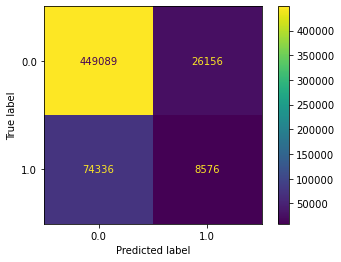

In [14]:
plot_confusion_matrix(rfc, X_test, y_test);

In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90    475245
         1.0       0.25      0.10      0.15     82912

    accuracy                           0.82    558157
   macro avg       0.55      0.52      0.52    558157
weighted avg       0.77      0.82      0.79    558157



In [16]:
rfc.feature_importances_

array([6.21890555e-02, 2.69354808e-02, 2.19571737e-02, 2.99781101e-02,
       2.01268906e-02, 2.94239033e-02, 3.33491760e-02, 3.41919096e-02,
       2.25549669e-02, 2.62033451e-02, 3.59379146e-02, 2.05342758e-02,
       5.17179120e-02, 6.63040804e-02, 5.57499826e-02, 6.08709053e-02,
       5.25182600e-02, 5.86918265e-02, 4.42442955e-04, 1.82142142e-04,
       5.00127004e-04, 9.70479185e-04, 2.68545698e-03, 2.65328887e-04,
       2.05203416e-03, 3.04055137e-04, 2.45275241e-04, 8.77283564e-04,
       4.49546084e-04, 3.52608690e-04, 2.30852740e-04, 1.71274457e-03,
       1.91595270e-04, 2.02831502e-03, 1.10522105e-04, 1.91547951e-04,
       5.51177062e-04, 2.27107126e-04, 1.13780776e-03, 7.03062884e-04,
       2.73397498e-04, 1.89390432e-04, 3.02164705e-04, 1.60068804e-04,
       6.02614945e-04, 1.34416676e-04, 7.08437317e-04, 1.66586398e-03,
       7.87936259e-04, 2.20984069e-04, 1.85532270e-04, 1.74166539e-03,
       5.60955871e-04, 5.73477051e-04, 5.07395857e-04, 1.84349815e-03,
      

In [18]:
pd.DataFrame(index = X.columns, data = rfc.feature_importances_, columns = ["Feature Importance"]).sort_values('Feature Importance')

,Feature Importance
ORIGIN_EGE,0.000009
ORIGIN_MTJ,0.000012
ORIGIN_PSC,0.000041
ORIGIN_JNU,0.000044
ORIGIN_MHT,0.000059
...,...
DAY_OF_WEEK_4,0.055750
DAY_OF_WEEK_7,0.058692
DAY_OF_WEEK_5,0.060871
DISTANCE,0.062189


## Random Forests with GridSearchCV

In [24]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
n_estimators = [64,100,128,200]

In [26]:
max_features = [2,3,4]

In [27]:
bootstrap = [True, False]

In [28]:
oob_score = [True, False]

In [29]:
param_grid = {'n_estimators':n_estimators,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'oob_score': oob_score}

In [30]:
rfc = RandomForestClassifier()

In [31]:
grid = GridSearchCV (rfc, param_grid)

In [32]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
rfc = RandomForestClassifier( max_features =4, n_estimators =200, oob_score= True)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc.oob_score_

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test, values_format='.6g')
plt.show();

In [ ]:
errors = []
misclassification = []

for n in range (1,200):
    
    rfc = RandomForestClassifier(n_estimators = n, max_features= 4)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed= np.sum(preds != y_test)
    
    errors.append(err)
    misclassification.append(n_missed)

In [ ]:
plt.plot(range (1,200), errors)